In [ ]:
#Author: Serkan Kutludag

In [1]:
import pandas as pd
df = pd.read_csv('data/genre_data_clean.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,audio_features,14J3PO0VnhtcRa31r7Aj1L,spotify:track:14J3PO0VnhtcRa31r7Aj1L,https://api.spotify.com/v1/tracks/14J3PO0Vnhtc...,https://api.spotify.com/v1/audio-analysis/14J3...,273573,4,1999,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,audio_features,2SZDu4esDLUISRnpYQE17b,spotify:track:2SZDu4esDLUISRnpYQE17b,https://api.spotify.com/v1/tracks/2SZDu4esDLUI...,https://api.spotify.com/v1/audio-analysis/2SZD...,277667,3,1999,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,audio_features,5E2EpolcGmcbYpsv0z6jAZ,spotify:track:5E2EpolcGmcbYpsv0z6jAZ,https://api.spotify.com/v1/tracks/5E2EpolcGmcb...,https://api.spotify.com/v1/audio-analysis/5E2E...,226933,4,1999,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,audio_features,5RVEXH7OR9rcRz7eeviOzc,spotify:track:5RVEXH7OR9rcRz7eeviOzc,https://api.spotify.com/v1/tracks/5RVEXH7OR9rc...,https://api.spotify.com/v1/audio-analysis/5RVE...,223948,4,1999,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,audio_features,7CNaYAdLyi86kofGafReiT,spotify:track:7CNaYAdLyi86kofGafReiT,https://api.spotify.com/v1/tracks/7CNaYAdLyi86...,https://api.spotify.com/v1/audio-analysis/7CNa...,139693,4,1999,acoustic


<AxesSubplot:>

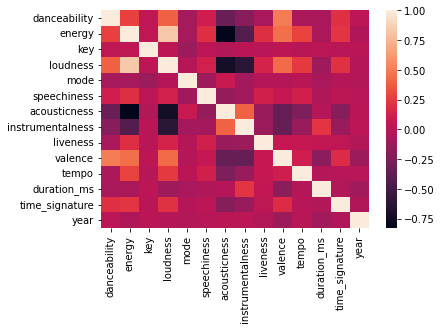

In [2]:
from seaborn import heatmap
heatmap(df.corr())

In [3]:
df = df.drop(["energy","loudness","type","id","uri","track_href","analysis_url"],axis=1)

<AxesSubplot:>

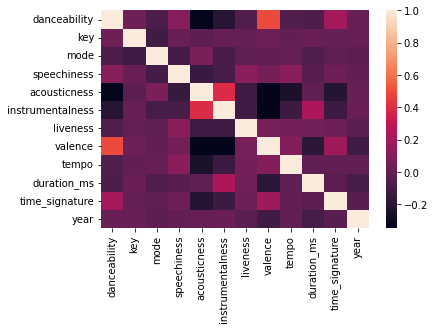

In [4]:
heatmap(df.corr())

In [5]:
df.head()

,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,genre
0,0.507,5,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,273573,4,1999,acoustic
1,0.496,11,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,277667,3,1999,acoustic
2,0.760,0,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,226933,4,1999,acoustic
3,0.607,1,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,223948,4,1999,acoustic
4,0.497,3,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,139693,4,1999,acoustic


In [8]:
df["genre"].unique()

array(['acoustic', 'blues', 'classical', 'country', 'dance', 'jazz',
       'metal', 'pop', 'rock', 'techno'], dtype=object)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["genre"] = le.fit_transform(df["genre"])
df.head()

,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,genre
0,0.507,5,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,273573,4,1999,0
1,0.496,11,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,277667,3,1999,0
2,0.760,0,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,226933,4,1999,0
3,0.607,1,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,223948,4,1999,0
4,0.497,3,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,139693,4,1999,0


In [10]:
df["genre"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np

y = df["genre"]
df_OneHot = df.loc[:,("time_signature","mode","key")]
enc = OneHotEncoder()
enc.fit(df_OneHot)
onehotlabels = enc.transform(df_OneHot).toarray()

df_scaled = df.drop(["year","genre","time_signature","mode","key"], axis=1)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = np.append(df_scaled,onehotlabels,axis=1)
df_scaled.shape

(12000, 27)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, stratify=y, test_size=1/6, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_gridLR = [{
    'solver': ["saga", "lbfgs", "newton-cg"],
    'multi_class' : ["ovr"]
}]
lr_clf = LogisticRegression(random_state=11)
grid_searchLR = GridSearchCV(lr_clf, param_gridLR,n_jobs=-1)
grid_searchLR.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=11), n_jobs=-1,
             param_grid=[{'multi_class': ['ovr'],
                          'solver': ['saga', 'lbfgs', 'newton-cg']}])

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

final_modelLR = grid_searchLR.best_estimator_
print("Estimator of LR: "+str(final_modelLR))
y_pred_trainLR = final_modelLR.predict(X_train)
print("Accuracy of LR on training: "+str(accuracy_score(y_train, y_pred_trainLR)))
y_predLR = final_modelLR.predict(X_test)
print("Accuracy of LR on testing: "+str(accuracy_score(y_test, y_predLR)))
print("Precision of LR: "+str(precision_score(y_test, y_predLR,average=None)))
print("F1 of LR: "+str(f1_score(y_test, y_predLR,average=None)))
print("Recall of LR: "+str(recall_score(y_test, y_predLR,average=None)))

Estimator of LR: LogisticRegression(multi_class='ovr', random_state=11, solver='saga')
Accuracy of LR on training: 0.4373
Accuracy of LR on testing: 0.4285
Precision of LR: [0.32941176 0.30188679 0.80769231 0.35616438 0.36271186 0.475
 0.40322581 0.17391304 0.15384615 0.64851485]
F1 of LR: [0.36923077 0.20915033 0.82352941 0.42276423 0.43232323 0.35625
 0.52447552 0.06504065 0.10526316 0.65174129]
Recall of LR: [0.42  0.16  0.84  0.52  0.535 0.285 0.75  0.04  0.08  0.655]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
param_gridKNN = [{
    'n_neighbors': [10, 20, 30, 50, 100, 150, 200],
    'algorithm': ["auto", "ball_tree", "kd_tree","brute"]
}]
knn_clf = KNeighborsClassifier()
grid_searchKNN = GridSearchCV(knn_clf, param_gridKNN,n_jobs=-1)
grid_searchKNN.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [10, 20, 30, 50, 100, 150, 200]}])

In [16]:
final_modelKNN = grid_searchKNN.best_estimator_
print("Estimator of KNN: "+str(final_modelKNN))
y_pred_trainKNN = final_modelKNN.predict(X_train)
print("Accuracy of KNN on training: "+str(accuracy_score(y_train, y_pred_trainKNN)))
y_predKNN = final_modelKNN.predict(X_test)
print("Accuracy of KNN on testing: "+str(accuracy_score(y_test, y_predKNN)))
print("Precision of KNN: "+str(precision_score(y_test, y_predKNN,average=None)))
print("F1 of KNN: "+str(f1_score(y_test, y_predKNN,average=None)))
print("Recall of KNN: "+str(recall_score(y_test, y_predKNN,average=None)))

Estimator of KNN: KNeighborsClassifier(n_neighbors=10)
Accuracy of KNN on training: 0.482
Accuracy of KNN on testing: 0.361
Precision of KNN: [0.24714829 0.22941176 0.74090909 0.24271845 0.31221719 0.4047619
 0.37241379 0.22857143 0.16981132 0.57894737]
F1 of KNN: [0.28077754 0.21081081 0.77619048 0.29469548 0.32779097 0.31288344
 0.44081633 0.15737705 0.11764706 0.56410256]
Recall of KNN: [0.325 0.195 0.815 0.375 0.345 0.255 0.54  0.12  0.09  0.55 ]


In [17]:
from sklearn.svm import SVC
param_gridSVM = [{
    'kernel': ["poly","linear","rbf"]
}]
svm_clf = SVC()
grid_searchSVM = GridSearchCV(svm_clf, param_gridSVM,n_jobs=-1)
grid_searchSVM.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'kernel': ['poly', 'linear', 'rbf']}])

In [18]:
final_modelSVM = grid_searchSVM.best_estimator_
print("Estimator of SVM: "+str(final_modelSVM))
y_pred_trainSVM = final_modelSVM.predict(X_train)
print("Accuracy of SVM on training: "+str(accuracy_score(y_train, y_pred_trainSVM)))
y_predSVM = final_modelSVM.predict(X_test)
print("Accuracy of SVM on testing: "+str(accuracy_score(y_test, y_predSVM)))
print("Precision of SVM: "+str(precision_score(y_test, y_predSVM,average=None)))
print("F1 of SVM: "+str(f1_score(y_test, y_predSVM,average=None)))
print("Recall of SVM: "+str(recall_score(y_test, y_predSVM,average=None)))

Estimator of SVM: SVC(kernel='poly')
Accuracy of SVM on training: 0.4773
Accuracy of SVM on testing: 0.4355
Precision of SVM: [0.35449735 0.32380952 0.86772487 0.32058824 0.36038961 0.50649351
 0.3962766  0.25490196 0.19047619 0.75308642]
F1 of SVM: [0.34447301 0.22295082 0.84318766 0.4037037  0.43700787 0.44067797
 0.51736111 0.10358566 0.14723926 0.67403315]
Recall of SVM: [0.335 0.17  0.82  0.545 0.555 0.39  0.745 0.065 0.12  0.61 ]


In [19]:
 from sklearn.ensemble import AdaBoostClassifier
param_gridADA = [{
    'n_estimators': [50,100,200,500],
    'learning_rate': [0.5, 0.7, 0.9]
}]
ada_clf = AdaBoostClassifier()
grid_searchADA = GridSearchCV(ada_clf, param_gridADA,n_jobs=-1)
grid_searchADA.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.5, 0.7, 0.9],
                          'n_estimators': [50, 100, 200, 500]}])

In [20]:
final_modelADA = grid_searchADA.best_estimator_
print("Estimator of ADA: "+str(final_modelADA))
y_pred_trainADA = final_modelADA.predict(X_train)
print("Accuracy of ADA on training: "+str(accuracy_score(y_train, y_pred_trainADA)))
y_predADA = final_modelADA.predict(X_test)
print("Accuracy of ADA on testing: "+str(accuracy_score(y_test, y_predADA)))
print("Precision of ADA: "+str(precision_score(y_test, y_predADA,average=None)))
print("F1 of ADA: "+str(f1_score(y_test, y_predADA,average=None)))
print("Recall of ADA: "+str(recall_score(y_test, y_predADA,average=None)))

Estimator of ADA: AdaBoostClassifier(learning_rate=0.5)
Accuracy of ADA on training: 0.4331
Accuracy of ADA on testing: 0.4215
Precision of ADA: [0.31472081 0.32824427 0.66666667 0.3772242  0.37037037 0.39698492
 0.44736842 0.17073171 0.14414414 0.66346154]
F1 of ADA: [0.31234257 0.25981873 0.67326733 0.44074844 0.45801527 0.39598997
 0.53968254 0.05809129 0.10289389 0.67647059]
Recall of ADA: [0.31  0.215 0.68  0.53  0.6   0.395 0.68  0.035 0.08  0.69 ]


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
param_gridGBC = [{
    'n_estimators': [20,50,100,200],
    "max_depth": [1,3,5,10],
    "max_features": [None, "sqrt"]
}]
gbc_clf = GradientBoostingClassifier()
grid_searchGBC = GridSearchCV(gbc_clf, param_gridGBC,n_jobs=-1)
grid_searchGBC.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [1, 3, 5, 10],
                          'max_features': [None, 'sqrt'],
                          'n_estimators': [20, 50, 100, 200]}])

In [22]:
final_modelGBC = grid_searchGBC.best_estimator_
print("Estimator of GBC: "+str(final_modelGBC))
y_pred_trainGBC = final_modelGBC.predict(X_train)
print("Accuracy of GBC on training: "+str(accuracy_score(y_train, y_pred_trainGBC)))
y_predGBC = final_modelGBC.predict(X_test)
print("Accuracy of GBC on testing: "+str(accuracy_score(y_test, y_predGBC)))
print("Precision of GBC: "+str(precision_score(y_test, y_predGBC,average=None)))
print("F1 of GBC: "+str(f1_score(y_test, y_predGBC,average=None)))
print("Recall of GBC: "+str(recall_score(y_test, y_predGBC,average=None)))

Estimator of GBC: GradientBoostingClassifier(max_features='sqrt')
Accuracy of GBC on training: 0.5684
Accuracy of GBC on testing: 0.4795
Precision of GBC: [0.37244898 0.37244898 0.84771574 0.40594059 0.38305085 0.55555556
 0.48611111 0.33898305 0.15789474 0.6937799 ]
F1 of GBC: [0.36868687 0.36868687 0.84130982 0.48906561 0.45656566 0.49723757
 0.57377049 0.15444015 0.10169492 0.70904645]
Recall of GBC: [0.365 0.365 0.835 0.615 0.565 0.45  0.7   0.1   0.075 0.725]


In [23]:
from sklearn.ensemble import RandomForestClassifier
param_gridRF = [{
    'n_estimators': [150, 200, 250],
    'max_features': ["sqrt"],
    'max_depth': [20, 26, 32, 38],
    'min_samples_split': [7, 10, 13, 16],
    'min_samples_leaf': [7, 10, 13, 16]
}]
rf_clf = RandomForestClassifier()
grid_searchRF = GridSearchCV(rf_clf, param_gridRF)
grid_searchRF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [20, 26, 32, 38],
                          'max_features': ['sqrt'],
                          'min_samples_leaf': [7, 10, 13, 16],
                          'min_samples_split': [7, 10, 13, 16],
                          'n_estimators': [150, 200, 250]}])

In [24]:
final_modelRF = grid_searchRF.best_estimator_
print("Estimator of RF: "+str(final_modelRF))
y_pred_trainRF = final_modelRF.predict(X_train)
print("Accuracy of RF on training: "+str(accuracy_score(y_train, y_pred_trainRF)))
y_predRF = final_modelRF.predict(X_test)
print("Accuracy of RF on testing: "+str(accuracy_score(y_test, y_predRF)))
print("Precision of RF: "+str(precision_score(y_test, y_predRF,average=None)))
print("F1 of RF: "+str(f1_score(y_test, y_predRF,average=None)))
print("Recall of RF: "+str(recall_score(y_test, y_predRF,average=None)))

Estimator of RF: RandomForestClassifier(max_depth=26, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=13, n_estimators=250)
Accuracy of RF on training: 0.6366
Accuracy of RF on testing: 0.4825
Precision of RF: [0.36945813 0.37297297 0.8125     0.39869281 0.38317757 0.56737589
 0.46984127 0.39473684 0.19354839 0.68778281]
F1 of RF: [0.37220844 0.35844156 0.82843137 0.48221344 0.47216891 0.46920821
 0.57475728 0.12605042 0.09160305 0.72209026]
Recall of RF: [0.375 0.345 0.845 0.61  0.615 0.4   0.74  0.075 0.06  0.76 ]


In [25]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=
        [('rf', RandomForestClassifier(max_depth=26, max_features='sqrt', min_samples_leaf=10, min_samples_split=13, n_estimators=250)),
        ('gbc', GradientBoostingClassifier(max_features='sqrt', n_estimators=200)),
        ("lr",LogisticRegression(multi_class='ovr', random_state=11, solver='saga'))
        ],voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=26,
                                                     max_features='sqrt',
                                                     min_samples_leaf=10,
                                                     min_samples_split=13,
                                                     n_estimators=250)),
                             ('gbc',
                              GradientBoostingClassifier(max_features='sqrt',
                                                         n_estimators=200)),
                             ('lr',
                              LogisticRegression(multi_class='ovr',
                                                 random_state=11,
                                                 solver='saga'))])

In [26]:
y_pred_trainVOT = voting_clf.predict(X_train)
print("Accuracy of Ensemble on training: "+str(accuracy_score(y_train, y_pred_trainVOT)))
y_predVOT = voting_clf.predict(X_test)
print("Accuracy of Ensemble on testing: "+str(accuracy_score(y_test, y_predVOT)))
print("Precision of Ensemble: "+str(precision_score(y_test, y_predVOT,average=None)))
print("F1 of Ensemble: "+str(f1_score(y_test, y_predVOT,average=None)))
print("Recall of Ensemble: "+str(recall_score(y_test, y_predVOT,average=None)))

Accuracy of Ensemble on training: 0.6017
Accuracy of Ensemble on testing: 0.485
Precision of Ensemble: [0.35416667 0.37362637 0.82352941 0.39549839 0.39936102 0.59848485
 0.46273292 0.4137931  0.24137931 0.70334928]
F1 of Ensemble: [0.38636364 0.35602094 0.83168317 0.481409   0.48732943 0.47590361
 0.57088123 0.10480349 0.10852713 0.71882641]
Recall of Ensemble: [0.425 0.34  0.84  0.615 0.625 0.395 0.745 0.06  0.07  0.735]


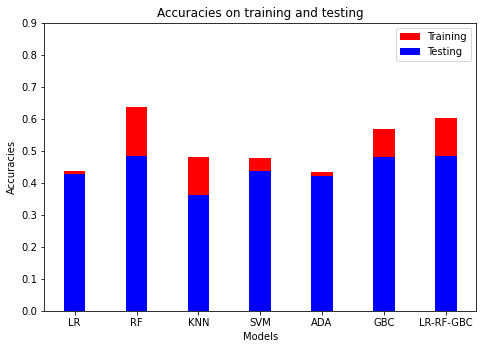

In [27]:
import matplotlib.pyplot as plt
import numpy as np
N = 7
model_training_accuracy = (accuracy_score(y_train, y_pred_trainLR), accuracy_score(y_train, y_pred_trainRF), accuracy_score(y_train, y_pred_trainKNN), accuracy_score(y_train, y_pred_trainSVM), accuracy_score(y_train, y_pred_trainADA),accuracy_score(y_train, y_pred_trainGBC),accuracy_score(y_train, y_pred_trainVOT))
model_testing_accuracy = (accuracy_score(y_test, y_predLR),accuracy_score(y_test, y_predRF), accuracy_score(y_test, y_predKNN), accuracy_score(y_test, y_predSVM), accuracy_score(y_test, y_predADA), accuracy_score(y_test, y_predGBC), accuracy_score(y_test, y_predVOT))
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, model_training_accuracy, width, color='r')
ax.bar(ind, model_testing_accuracy, width, color='b')
ax.set_ylabel('Accuracies')
ax.set_title('Accuracies on training and testing')
ax.set_xlabel('Models')
ax.set_xticks(ind)
ax.set_xticklabels(['LR', 'RF', 'KNN', 'SVM', 'ADA', 'GBC', 'LR-RF-GBC'])
ax.set_yticks(np.arange(0, 1, 0.1))
ax.legend(labels=['Training', 'Testing'])
plt.show()

In [28]:
import pickle
pickle.dump(final_modelLR, open("LR.sav", 'wb'))
pickle.dump(final_modelRF, open("RF.sav", 'wb'))
pickle.dump(final_modelKNN, open("KNN.sav", 'wb'))
pickle.dump(final_modelSVM, open("SVM.sav", 'wb'))
pickle.dump(final_modelADA, open("ADA.sav", 'wb'))
pickle.dump(final_modelGBC, open("GBC.sav", 'wb'))
pickle.dump(voting_clf, open("LR-RF-GBC.sav", 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))